In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
def display_image(image):
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.show(block = True)

In [3]:
def display_graph(image):
    sum_ = image.sum(axis = 0)
    
    plt.figure(figsize = (15, 8))
    x = list(range(len(sum_)))
    y = list(sum_)
    plt.scatter(x, y, alpha = 0.5)
    plt.show()

### Load

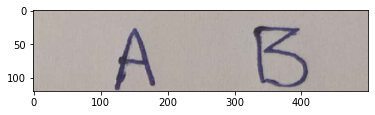

In [4]:
image = cv.imread("3.jpg")
image = cv.resize(image, (500, 300))
image = image[90:210, :]
display_image(image)

### Gray

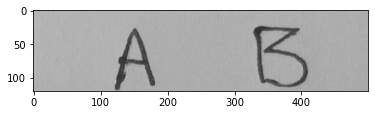

In [5]:
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
display_image(gray)

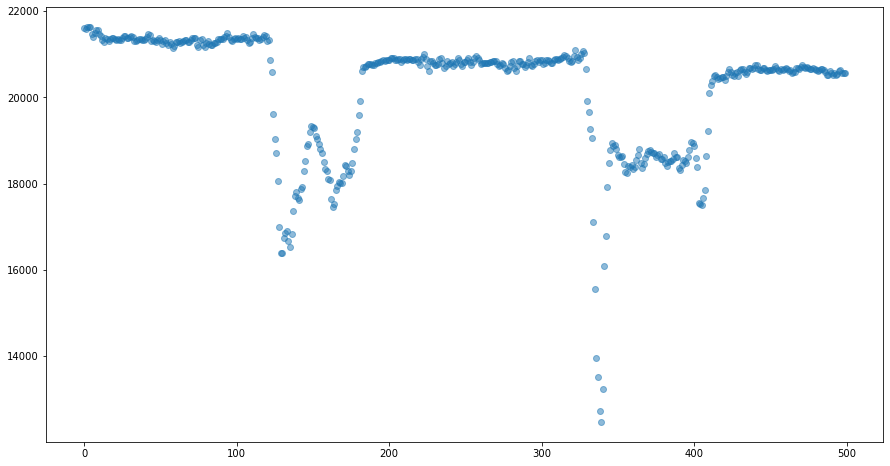

In [6]:
display_graph(gray)

### Blur

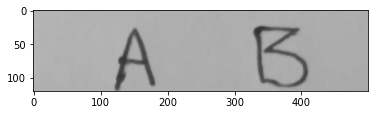

In [7]:
blur = cv.bilateralFilter(gray, 7, 75, 75) # need auto
display_image(blur)

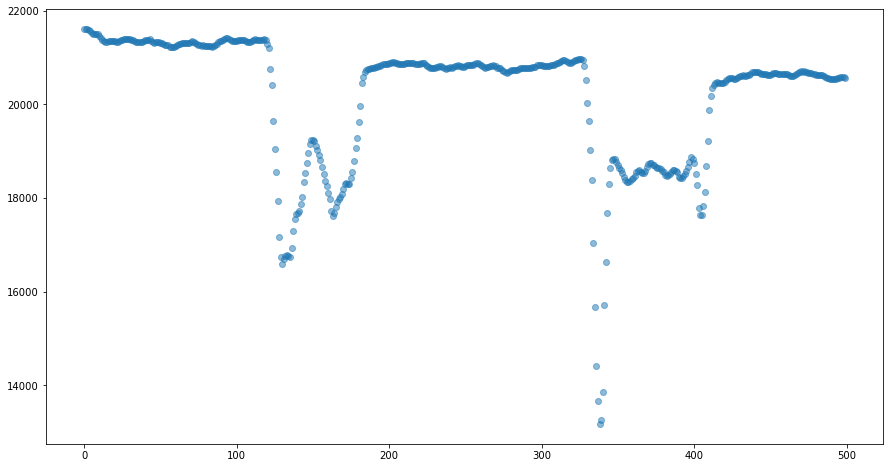

In [8]:
display_graph(blur)

### Threshold

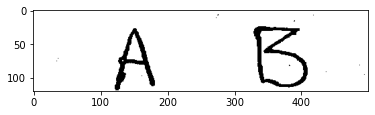

In [9]:
thresh = cv.adaptiveThreshold(blur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
display_image(thresh)

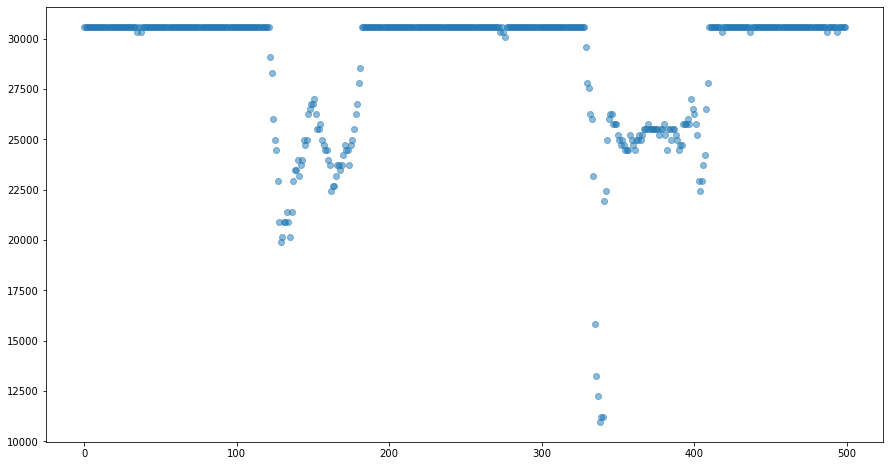

In [10]:
display_graph(thresh)

### Dilation

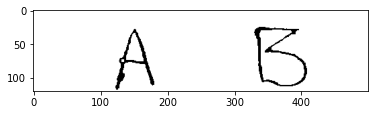

In [11]:
k = 3
kernal = np.ones((k, k), np.uint8)
dil = cv.dilate(thresh, kernal, iterations = 1) # need auto
display_image(dil)

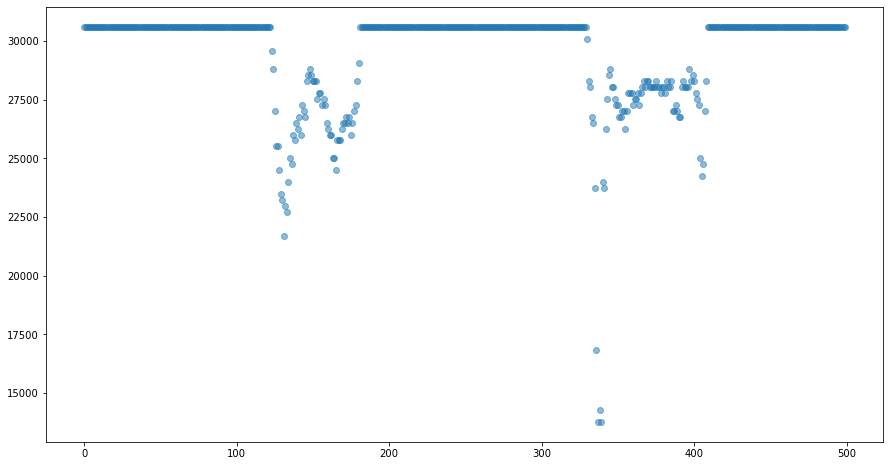

In [13]:
display_graph(dil)

# Cutting

In [14]:
def model1(l):
    maximum = max(l)
    cutout_dip = []
    cutout_up = []
    
    for i in range(len(l)):
        if (i + 1) != len(l):
            if l[i] == maximum:
                if (l[i + 1] < maximum):
                    cutout_dip.append(i)
            
            if l[i] < maximum:
                if (l[i + 1] == maximum):
                    cutout_up.append(i + 1)
    return cutout_up, cutout_dip

In [15]:
sum_ = dil.sum(axis = 0)

In [16]:
cutout_up, cutout_dip = model1(sum_)
cutout_up, cutout_dip

([181, 409], [122, 329])

In [17]:
def model2(image, cutout_up, cutout_dip):
    cutout_images = []
    for up, dip in zip(cutout_up, cutout_dip):
        temp = image[:, dip : up]
        cutout_images.append(temp)
    return cutout_images

In [18]:
cutout_images = model2(image, cutout_up, cutout_dip)

In [19]:
len(cutout_images)

2

image number :  1


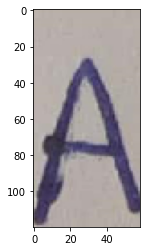

image number :  2


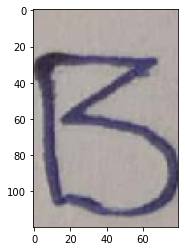

In [20]:
for i in range(len(cutout_images)):
    print("image number : ", i + 1)
    plt.imshow(cv.cvtColor(cutout_images[i], cv.COLOR_BGR2RGB))
    plt.show(block = True)

In [20]:
cutout_images_T = []
for cutout_image in cutout_images:
    cutout_images_T.append(cutout_image.T)

In [22]:
len(cutout_images_T)

2

In [21]:
for i in range(len(cutout_images_T)):
    print("image number : ", i + 1)
    plt.imshow(cv.cvtColor(cutout_images_T[i], cv.COLOR_BGR2RGB))
    plt.show(block = True)

image number :  1


error: OpenCV(4.5.1) c:\users\appveyor\appdata\local\temp\1\pip-req-build-oduouqig\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x0dcde1de::Set<3,4,-1>,struct cv::impl::A0x0dcde1de::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 120
